# Data Cleaning - Python

## Content
Each row represents a customer, each column contains customer’s attributes 
described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_homework = pd.read_csv("session_9_homework_telco.csv")
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# First, check the data type, whether it is already appropriate with its contextual content
df_homework.info()

# From the result, we can see TotalCharges has data type Object, yet by looking at the contextual content it should be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# TotalCharges should has numeric (float) data type
# Convert object to float
df_homework['TotalCharges'] = pd.to_numeric(df_homework['TotalCharges'],errors='coerce')

In [5]:
df_homework.info()

# Result: all datatype already appropriate to its contextual content
# From here, we can see TotalCharges has missing values, because the non-null content is different with data entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Handle Missing Value and Duplicated Rows

In [6]:
# Check the potential duplicated column
df_homework.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Check suspected duplicated column
duplicated_column = ["StreamingTV", "StreamingMovies"]
df_homework[duplicated_column].describe()

# Result: There is no duplicated column

,StreamingTV,StreamingMovies
count,7043,7043
unique,3,3
top,No,No
freq,2810,2785


In [8]:
# Check the duplicated row, if there is any, with customerID feature not dropped.
# Eventhough the data content seems duplicated, but if the customerID is different, then the data is unique
df_homework.duplicated().sum()

# Result: There is no duplicated row

0

In [9]:
# Check Missing Values
df_homework.isnull().sum()

# Result: There are missing values in TotalCharges feature

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Check the missing value percentage
(100.00 * df_homework.isnull().sum()) / df_homework.shape[0]

# The missing value percentage for TotalCharge is only 0.15%, so we need to impute the data.

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [11]:
df_homework["TotalCharges"].describe()
# Mean and Median is too far apart, the data is skewed to the left

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [12]:
# Impute the data with Median value, because the data is skewed to the left
df_homework["TotalCharges"] = df_homework["TotalCharges"].fillna(df_homework["TotalCharges"].median())

df_homework.isnull().sum()

# Result: there is no missing value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Outlier Management

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Find which Feature with numeric type
df_numerical = df_homework.select_dtypes(include=["int","float"]) 
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


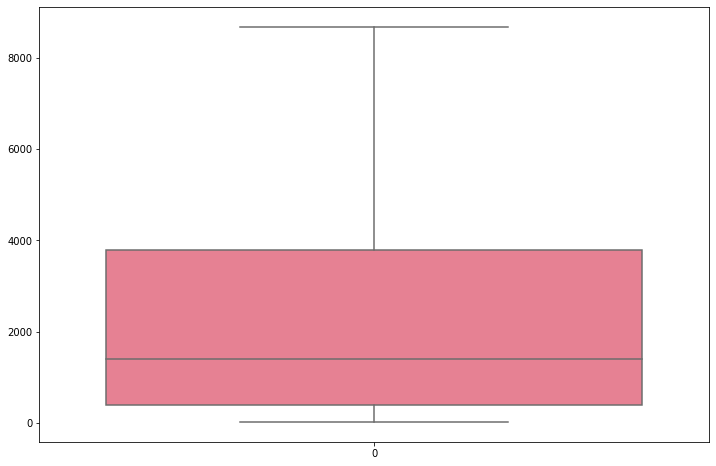

In [15]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8)) #(panjang, lebar)

# Boxplot using Seaborn
sns.boxplot(data=df_homework["TotalCharges"],
            palette="husl")

# Show the plot
plt.show()

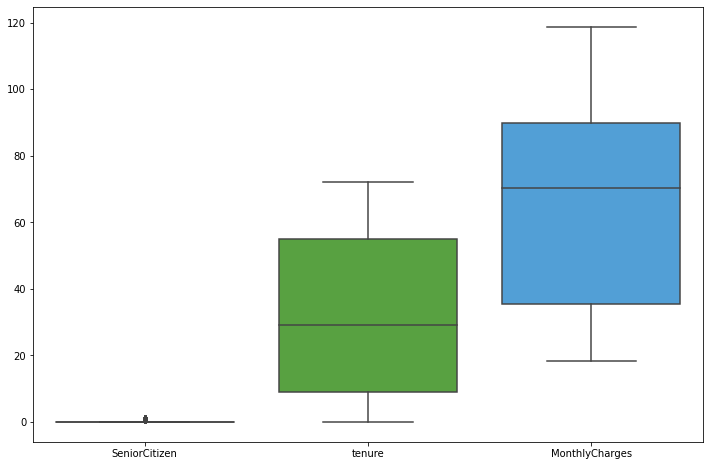

In [16]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8)) #(panjang, lebar)

# Boxplot using Seaborn
sns.boxplot(data=df_homework.drop(["customerID","TotalCharges"],axis=1),
            palette="husl")

# Show the plot
plt.show()

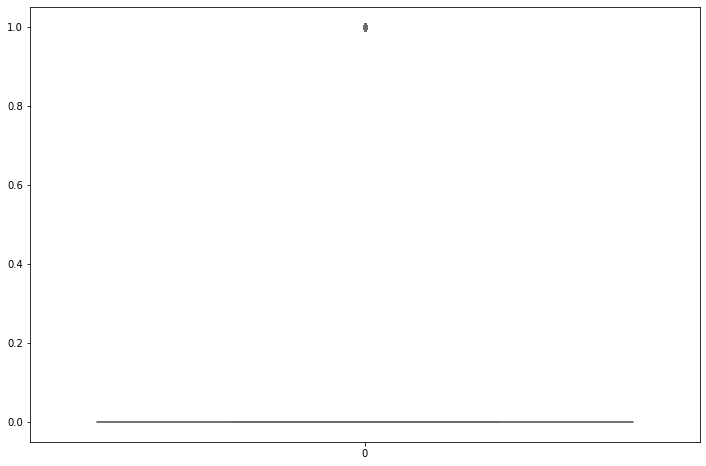

In [17]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8)) #(panjang, lebar)

# Boxplot using Seaborn
sns.boxplot(data=df_homework["SeniorCitizen"],
            palette="husl")

# Show the plot
plt.show()

# Only SeniorCitizen which has outlier
# However, the outlier values from SeniorCitizen is still being kept, because it was a True Observation.
# Despite being population deviant, it still can be accepted by logic, because there are many people above 65 years old

# 3. Feature Transformation

In [18]:
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# CustomerID doesn't need to be encoded or processed
df_ft = df_homework.drop(["customerID"],axis=1)

In [20]:
# Generate list of unique value from 'object' Features
def isi_feature(dataframe):
    for col in dataframe:
        if dataframe[col].dtypes == 'object':
            print(f'{col} : {dataframe[col].unique()}')

isi_feature(df_ft)

# There is many inconsistencies in data, such as No and No Phone Service/No Internet Service

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
# Replace the incosistent data with the correct value
df_ft.replace('No internet service','No',inplace=True)
df_ft.replace('No phone service','No',inplace=True)

isi_feature(df_ft)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
# One-Hot Encoding is used for gender, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, 
# StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Churn features

# Replace Yes/No to 1/0 and Male/Female to 1/0

yes_no_feature = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_feature:
    df_ft[col].replace({'Yes':1,'No':0},inplace=True)

df_ft["gender"].replace({'Male':1,'Female':0},inplace=True)

# One-Hot Encoding for PaymentMethod
df_ft = pd.get_dummies(df_ft,columns = ["PaymentMethod"])
df_ft.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,70.70,151.65,1,0,0,1,0


In [23]:
# Ordinal Encoding is used for InternetService and Contract

# Use .map(class) to replace value by value using dictionary
internet = {"No": 0, 
            "DSL": 1,
            "Fiber optic": 2}

df_ft["Internet"] = df_ft["InternetService"].map(internet)
df_ft[["InternetService","Internet"]].sample(5)

,InternetService,Internet
65,DSL,1
6410,DSL,1
5444,Fiber optic,2
2428,Fiber optic,2
3286,Fiber optic,2


In [24]:
contract_period = {"Month-to-month": 0, 
                   "One year": 1,
                   "Two year": 2}

df_ft["Contract_Encode"] = df_ft["Contract"].map(contract_period)
df_ft[["Contract","Contract_Encode"]].sample(5)

,Contract,Contract_Encode
2052,Month-to-month,0
6120,Month-to-month,0
6859,Two year,2
635,Month-to-month,0
5469,Month-to-month,0


In [25]:
# Dropped the original data
df_ft = df_ft.drop(["InternetService","Contract"],axis = 1)

In [26]:
# Rename the new encoded feature with original name
df_ft = df_ft.rename(columns = {"Internet": "InternetService","Contract_Encode": "Contract"})
df_ft.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService,Contract
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,1,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,1,1,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,1
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,2,0


In [27]:
# Scaling is used for Monthly Charges, TotalCharges, tenure so that the data range is not too far apart
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
feature_scaling = ["MonthlyCharges", "TotalCharges", "tenure"]

for col in feature_scaling:
    df_ft[col] = minmax_scaler.fit_transform(df_ft[col].values.reshape(len(df_ft), 1))
    # Show the data
    print(df_ft[col].tolist()[:20])

[0.11542288557213931, 0.3850746268656716, 0.35422885572139307, 0.23930348258706463, 0.5218905472636816, 0.8099502487562189, 0.7049751243781094, 0.11442786069651739, 0.8611940298507462, 0.3771144278606965, 0.3154228855721393, 0.006965174129353213, 0.8169154228855721, 0.8502487562189055, 0.8681592039800995, 0.945273631840796, 0.023880597014925342, 0.8800995024875623, 0.36766169154228856, 0.7144278606965173]
[0.001275098084468036, 0.21586660512347106, 0.010310408492960998, 0.21024117239787676, 0.015330025386568198, 0.09251096238172168, 0.22277867528271408, 0.032667897530579276, 0.3493249480729287, 0.4003173321024694, 0.06561850911608587, 0.035541195476575124, 0.6533925686591276, 0.578986845141934, 0.30778329102238633, 0.9088795291945534, 0.11587237479806141, 0.8496942072467113, 0.05879875375028849, 0.2127971382414032]
[0.013888888888888888, 0.4722222222222222, 0.027777777777777776, 0.625, 0.027777777777777776, 0.1111111111111111, 0.3055555555555555, 0.1388888888888889, 0.38888888888888884

In [28]:
df_ft[feature_scaling].describe()

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,0.462803,0.261149,0.449599
std,0.299403,0.261397,0.341104
min,0.000000,0.000000,0.000000
25%,0.171642,0.044245,0.125000
50%,0.518408,0.159090,0.402778
75%,0.712438,0.434780,0.763889
max,1.000000,1.000000,1.000000


In [29]:
# Find the number of unique values in the dataframe features
for x in df_ft:
    total_unique_values = len(df_ft[x].unique())
    print(f"Unique value of {x} is {total_unique_values}")

# tenure, MonthlyCharges, dan TotalCharges have too many unique values (73, 1585, 6531), compared to other feature which only 2 or 3 unique values

Unique value of gender is 2
Unique value of SeniorCitizen is 2
Unique value of Partner is 2
Unique value of Dependents is 2
Unique value of tenure is 73
Unique value of PhoneService is 2
Unique value of MultipleLines is 2
Unique value of OnlineSecurity is 2
Unique value of OnlineBackup is 2
Unique value of DeviceProtection is 2
Unique value of TechSupport is 2
Unique value of StreamingTV is 2
Unique value of StreamingMovies is 2
Unique value of PaperlessBilling is 2
Unique value of MonthlyCharges is 1585
Unique value of TotalCharges is 6531
Unique value of Churn is 2
Unique value of PaymentMethod_Bank transfer (automatic) is 2
Unique value of PaymentMethod_Credit card (automatic) is 2
Unique value of PaymentMethod_Electronic check is 2
Unique value of PaymentMethod_Mailed check is 2
Unique value of InternetService is 3
Unique value of Contract is 3


In [30]:
# To simplify the analysis, tenure, MonthlyCharge, and TotalCharge will be converted to categorical-data, by grouping into 10 classes
to_categorical = feature_scaling

for col in to_categorical:
    df_ft[col] = pd.qcut(df_ft[col], 10)

df_ft[to_categorical].head()

,MonthlyCharges,TotalCharges,tenure
0,"(0.0677, 0.275]","(-0.001, 0.00759]","(-0.001, 0.0278]"
1,"(0.275, 0.404]","(0.159, 0.234]","(0.403, 0.556]"
2,"(0.275, 0.404]","(0.00759, 0.0287]","(-0.001, 0.0278]"
3,"(0.0677, 0.275]","(0.159, 0.234]","(0.556, 0.694]"
4,"(0.518, 0.605]","(0.00759, 0.0287]","(-0.001, 0.0278]"


In [31]:
# Convert the categorical-data class to Ordinal, start from class which has the lowest value: 0, until the class which has the highest value: 9 (10 classes)
from sklearn.preprocessing import LabelEncoder

for col in to_categorical:        
    df_ft[col] = LabelEncoder().fit_transform(df_ft[col])

df_ft[to_categorical].head()

,MonthlyCharges,TotalCharges,tenure
0,2,0,0
1,3,5,5
2,3,1,0
3,2,5,6
4,5,1,0


In [32]:
# Final Data
df_ft.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService,Contract
6073,0,0,1,1,8,1,1,0,0,0,0,0,0,0,1,5,0,0,0,0,1,0,1
594,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
4922,0,0,1,1,8,1,1,1,1,0,0,0,0,0,4,7,0,0,0,1,0,1,0
5900,1,0,1,1,5,0,0,1,1,1,0,0,0,0,2,5,1,1,0,0,0,1,0
2280,0,1,0,0,2,1,1,0,0,0,1,1,1,1,8,3,0,0,1,0,0,2,0
2234,1,0,1,1,4,1,1,0,1,0,1,0,0,0,4,5,0,0,0,0,1,1,2
5870,1,0,1,1,1,1,1,0,0,0,0,0,0,1,2,1,1,1,0,0,0,0,0
6659,1,0,1,0,9,1,1,1,1,1,1,1,1,0,7,9,0,0,1,0,0,1,2
4878,1,0,1,0,5,1,1,0,0,0,0,1,0,1,4,5,0,0,1,0,0,1,0
476,1,1,1,1,5,1,0,0,1,0,1,1,1,1,5,6,0,0,0,1,0,1,0


In [33]:
df_ft.info()

# All feature data type are already numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7043 non-null   int64
 1   SeniorCitizen                            7043 non-null   int64
 2   Partner                                  7043 non-null   int64
 3   Dependents                               7043 non-null   int64
 4   tenure                                   7043 non-null   int64
 5   PhoneService                             7043 non-null   int64
 6   MultipleLines                            7043 non-null   int64
 7   OnlineSecurity                           7043 non-null   int64
 8   OnlineBackup                             7043 non-null   int64
 9   DeviceProtection                         7043 non-null   int64
 10  TechSupport                              7043 non-null   int64
 11  Stre